# 📖 TABLE OF CONTENTS

- [1. Graduate Admission Prediction using Artificial Neural Networks (ANNs)]()
- [2. Graduate Admission Dataset Description]()
- [3. Load, Explore & Preprocess Dataset]()
- [4. Model Building]()
- [5. Model Training]()
- [6. Model Prediction]()
- [7. Experiment: Use Updated Model]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Graduate Admission Prediction using Artificial Neural Networks (ANNs)

Graduate Admission Prediction is a crucial task for universities and students alike, as it helps estimate a candidate's likelihood of securing admission based on their academic and extracurricular profile. This project aims to develop a predictive model using Artificial Neural Networks (ANNs) to predict the probability of graduate admission based on a variety of factors. These factors include GRE scores, TOEFL scores, university ratings, and more, which are considered important in determining a student's chance of admission into graduate programs. By leveraging the power of neural networks, we aim to create a model that accurately predicts the chances of admission (**"Chance of Admit"**), which can assist students in better understanding their admission prospects and preparing accordingly.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Graduate Admission Dataset Description

The [Graduate Admission dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions), sourced from Kaggle, is designed to predict graduate admissions from an Indian perspective. This dataset draws inspiration from the UCLA Graduate Dataset and includes several key parameters that influence the admission decision process for Master's programs. The dataset consists of the following features:

- **GRE Scores:** Scores ranging from 0 to 340, reflecting the candidate's performance in the Graduate Record Examination.

- **TOEFL Scores:** Scores ranging from 0 to 120, measuring the candidate's proficiency in English as part of the Test of English as a Foreign Language.

- **University Rating:** An ordinal rating from 1 to 5, representing the prestige of the university the applicant is applying to.

- **Statement of Purpose and Letter of Recommendation Strength:** Rated on a scale from 1 to 5, this parameter reflects the quality and strength of the candidate's application materials.

- **Undergraduate GPA:** A score ranging from 0 to 10, representing the candidate's academic performance during their undergraduate studies.

- **Research Experience:** A binary variable (0 or 1) indicating whether the candidate has prior research experience.

- **Chance of Admit:** The target variable, ranging from 0 to 1, indicating the predicted likelihood of a candidate being admitted to the graduate program.

This dataset serves as the foundation for building a regression model to predict a candidate's probability of admission based on these features.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Load, Explore & Preprocess Dataset

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("data/datasets/02-Deep-Learning-Projects/DL_Project_03_Graduate_Admission_Prediction_using_ANN/Admission_Predict_Ver1.1.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# Remove column "Serial No."
df.drop("Serial No.", inplace=True, axis=1)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Model Building

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(1, activation="linear"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Model Training

In [ ]:
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mean_absolute_error"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0436 - mean_absolute_error: 0.1810 - val_loss: 0.0368 - val_mean_absolute_error: 0.1478
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0313 - mean_absolute_error: 0.1411 - val_loss: 0.0332 - val_mean_absolute_error: 0.1342
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.1228 - val_loss: 0.0288 - val_mean_absolute_error: 0.1263
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.1265 - val_loss: 0.0239 - val_mean_absolute_error: 0.1163
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.1161 - val_loss: 0.0207 - val_mean_absolute_error: 0.1088
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mean_absolute_error: 0.1026 - val_loss: 0.0184 - val_mean_absolute_error: 0.1040
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.1019 - val_loss: 0.01

In [ ]:
print(history.history)

{'loss': [0.040492407977581024, 0.030153686180710793, 0.026072630658745766, 0.023165788501501083, 0.020503995940089226, 0.018696989864110947, 0.017343511804938316, 0.016357965767383575, 0.01533650141209364, 0.01445851195603609], 'mean_absolute_error': [0.16979005932807922, 0.13512907922267914, 0.12402071803808212, 0.11661795526742935, 0.10887864977121353, 0.10392999649047852, 0.10115046799182892, 0.09846602380275726, 0.09585575759410858, 0.09311352670192719], 'val_loss': [0.036772221326828, 0.0331694521009922, 0.02884543500840664, 0.02385782264173031, 0.020676428452134132, 0.018410662189126015, 0.016857080161571503, 0.015470449812710285, 0.014531655237078667, 0.013577749952673912], 'val_mean_absolute_error': [0.14781944453716278, 0.13418999314308167, 0.12631936371326447, 0.11627255380153656, 0.10879155248403549, 0.10398682206869125, 0.10042597353458405, 0.09632323682308197, 0.09338635206222534, 0.09008531272411346]}


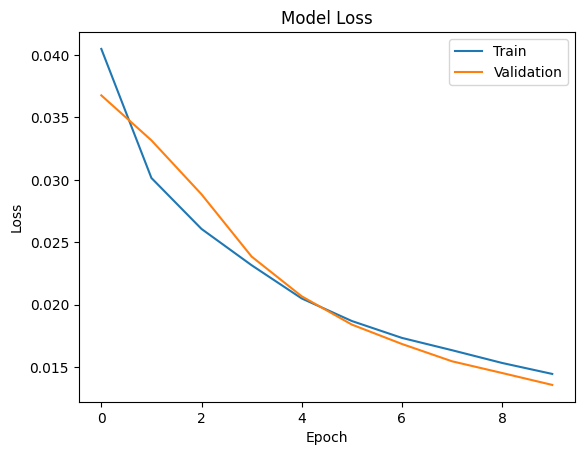

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

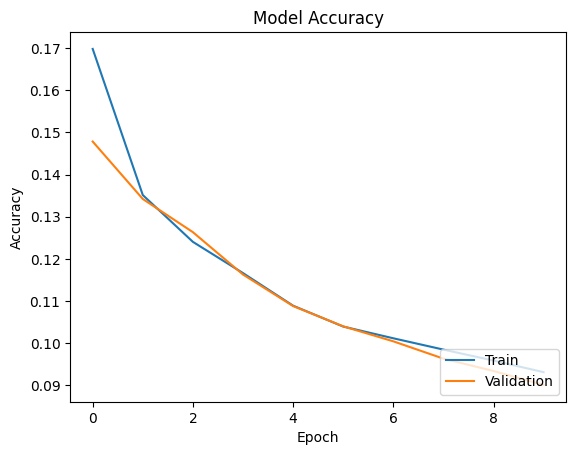

In [ ]:
plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Model Prediction

In [ ]:
y_pred = model.predict(X_test_scaled)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.38425687603717373


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Experiment: Use Updated Model

In [ ]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mean_absolute_error"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0857 - mean_absolute_error: 0.2427 - val_loss: 0.0820 - val_mean_absolute_error: 0.2368
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0701 - mean_absolute_error: 0.2214 - val_loss: 0.0682 - val_mean_absolute_error: 0.2152
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0545 - mean_absolute_error: 0.1947 - val_loss: 0.0555 - val_mean_absolute_error: 0.1913
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0458 - mean_absolute_error: 0.1756 - val_loss: 0.0452 - val_mean_absolute_error: 0.1712
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0343 - mean_absolute_error: 0.1515 - val_loss: 0.0392 - val_mean_absolute_error: 0.1622
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - mean_absolute_error: 0.1399 - val_loss: 0.0357 - val_mean_absolute_error: 0.1562
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.1260 - val_los

In [ ]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.738249851263725


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)